<a href="https://colab.research.google.com/github/dev-S-t/infosis/blob/main/Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = fetch_california_housing()

X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

input_shape = X_train_scaled.shape[1]

inputs = tf.keras.Input(shape=(input_shape,))

hidden_layer1 = layers.Dense(64, activation="relu")(inputs)
hidden_layer2 = layers.Dense(32, activation="relu")(hidden_layer1)

output_layer = layers.Dense(1)(hidden_layer2)

model = tf.keras.Model(inputs=inputs, outputs=output_layer)

model.compile(optimizer="adam", loss="mean_squared_error")


In [5]:

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
465/465 [==============================] - 3s 3ms/step - loss: 0.8311 - val_loss: 0.5107
Epoch 2/10
465/465 [==============================] - 2s 4ms/step - loss: 0.4041 - val_loss: 0.4029
Epoch 3/10
465/465 [==============================] - 2s 4ms/step - loss: 0.3665 - val_loss: 0.3978
Epoch 4/10
465/465 [==============================] - 2s 3ms/step - loss: 0.3592 - val_loss: 0.3710
Epoch 5/10
465/465 [==============================] - 2s 5ms/step - loss: 0.3457 - val_loss: 0.3832
Epoch 6/10
465/465 [==============================] - 3s 5ms/step - loss: 0.3278 - val_loss: 0.3597
Epoch 7/10
465/465 [==============================] - 2s 4ms/step - loss: 0.3191 - val_loss: 0.3442
Epoch 8/10
465/465 [==============================] - 2s 5ms/step - loss: 0.3178 - val_loss: 0.3358
Epoch 9/10
465/465 [==============================] - 2s 5ms/step - loss: 0.3112 - val_loss: 0.3346
Epoch 10/10
465/465 [==============================] - 2s 5ms/step - loss: 0.3012 - val_loss: 0.3212

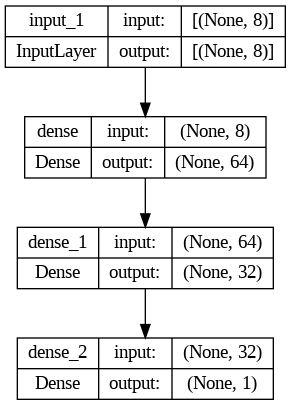

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [6]:

loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")


129/129 [==============================] - 1s 4ms/step - loss: 0.3100
Test Loss: 0.3100
